# 웹데이터

## 1.1 학습내용

### 1.1.1 목표

* 웹데이터를 프로그램으로 가져올 수 있다.
* 가져온 웹데이터를 정리하여 (parsing) 분석가능한 형식으로 만들 수 있다.
* dom, xpath, css.selector 데이터를 추출할 수 있다.
* crawling framework을 사용하여 데이터를 추출할 수 있다.

### 1.1.2 문제

* 웹데이터-1: python.org 페이지를 크롤링해서 http url를 출력하기
    * regex
    * BeautifulSoup
    * xpath
    * css selector
* 웹데이터-2: 웹파일 가져와서 자료구조에 넣기
    * uci 기계학습데이터
* 웹데이터-3: wiki에서 'python'으로 검색해서 http url출력하기
    * REST get query
    * 구글에서 검색하기
    * 위키에서 검색하기
    * 위키에서 css selector
* * 웹데이터-4: 한국 포털사이트에서 노래 제목을 검색
    * 검색 scraping - ?key=value&...
    * regex
    * lxml css selector - 노래제목, 아티스트, 앨범 출력
* 웹데이터-5: 국제학회 목록을 크롤링하기
    * lxml css.selector
* 웹데이터-6: 프로야구 기록 scraping
    * kbreport.com
    * 단순 문자열 검색
* 웹데이터-7: 프리미어리그 크롤링
    * Scrapy xpath
* 웹데이터-8: 페이지가 있는 사이트 크롤링하기
    * toscrape.com 가상의 서점과 인용문을 제공하고 있어, 연습하기 좋은 사이트
* 웹데이터-9: Reddit 크롤링하기
    * Scrapy xpath

### 1.1.3 연습
* 연습 웹데이터-1: 코스피200 데이터 가져오기
* 연습 웹데이터-2: Scrapy를 사용하여 Tripadvisor 크롤링하기
* 연습 웹데이터-3: 신문 크롤링 해보기
* 연습 웹데이터-4: 영화


## 1.2 웹으로 나가기

### 1.2.1  웹데이터란?

* 클라이언트와 서버로서의 웹
    * 자신의 컴퓨터 에서(클라이언트) 웹브라우저를 열어서 웹주소를 요청하면
    * 네트워크를 통해 서버에 요청하고, 웹페이지를 반환
    * 반환된 페이지는 html이라서, 사람이 그대로 읽기가 불편
    * 웹브라우저를 사용하면 html을 보기 좋게 보여준다 (html을 태그를 스타일에 따라 브라우저에 표현한다).

* 웹데이터는 인터넷에 저장된 데이터로서, http통신으로 교환.
    * http (HpyerText Transfer Protocol)는 웹프로토콜 (서로 데이터를 주고 받는 약속)
    * socket 80번 포트를 사용한다.
    * request(s)로 요청하고, response(s)를 반환한다.
    * 웹데이터는 보통 html, xml, json 형식을 가진다.

In [1]:
import iplantuml

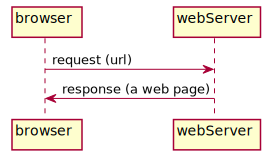

In [2]:
%%plantuml
@startuml
browser -> webServer:request (url)
webServer -> browser:response (a web page)
@enduml

###  1.2.2 웹 데이터 가져오기

* 여기서는 웹데이터를 가져오는 단계를 해 본다. 웹 URL에서 데이터를 읽어서 필요한 데이터 항목을 크롤링
    * 가져오는 방식
        * web scraping - 자동, api아닌 방식 (api가 없는 경우 사용)
        * api - 자동 (xml, json으로 반환)
    * 절차
        * 웹사이트에 요청(request)
            * GET, POST 방식 - urlstring의 구조 이해하기
        * 웹사이트 결과(repsponse) 가져오기
            * 결과 처리 (parser)
            * 반복하기 - 다음 response는 어떻게 가져오나
* 가져온 데이터는 저장 (xml, json, csv), 정리, 분석, 시각화가 필요하다.
* 데이터의 법적인 문제 - crawl데이터의 저작권법

* library
    * urllib - handles opening and reading URLs
    * httplib - handles http requests, urllib내부에서 사용하고 있슴.
    * requests - web page가져오거나, API를 사용할 때. 아래는 서로 같은 기능을 한다.
        ```
        urllib2.urlopen(url).read()
        requests.get(url).text
        ```

    * HTMLParser - parser <- comes with lxml
    * BeautifulSoup - Python으로 구현된 parser (does not support XPath expressions.)
        ```
        from bs4 import BeautifulSoup
        ```
    
    * curl - Terminal에서 사용하는 명령어
    * lxml - is written in C and thus faster than bs. xml and html parser
    * regex
    * scrapy
        * full framework
        * use pipelines
        * use for a big project. (for a small project, use requests,lxml or BeautifulSoup

구분 | 라이브러리 | 설명
-----|-----|-----
웹데이터 가져오기 | urllib, requests, curl | 웹페이지 열고, http request(s), http response(s)
웹데이터 파싱 | HTMLParser, BeautifulSoup, lxml, regex | 문자열 또는 xml, json을 파싱
프레임워크 | scrapy (java nutch, crawler4j) | 큰 프로젝트에 사용


### 1.2.3 uri

* URI Uniform Resource Identifier 특정자원을 지칭하는 고유명사
* URI 가운데 가장 많이 쓰이는 것이 인터넷주소 url (Uniform Resource Locator)
* 형식
    * 
    ```
    scheme:[//[user:password@]host[:port]][/]path[?query][#fragment]
    ```
    * 로컬 html 파일보기 (file://host/path/to/html)
        * 위 URI 형식을 지켜서 페이지를 열어야 한다.
        * 한글은 meta charset을 utf-8로 지정한다.
    * 웹페이지 열어보기

In [53]:
%%writefile mypage.html
<!DOCTYPE html>
<html>
<head>
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

Writing mypage.html


* 로컬에 저장된 파일을 읽어오는 uri를 구성한다.
* 웹브라우저에서 파일을 열려면 시간이 좀 걸린다 (몇 초 정도)

In [1]:
import webbrowser
import os

myuri='file://'+'localhost'+os.path.join(os.getcwd(), 'mypage.html')
webbrowser.open(myuri)
# uri형식을 지키지 않으면 안된다.
# webbrowser.open('mypage.html')

True

### 한글

* 한글은 meta charset을 정의해 준다.

In [3]:
%%writefile mypage.html
<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

Overwriting mypage.html


In [4]:
webbrowser.open(myuri)

True

* ipython notebook에서 html을 표현한다.

In [3]:
%%HTML
<!DOCTYPE html>
<html>
<head>
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

* 원격의 uri를 구성한다.

In [32]:
#브라우저에서 지도 열기
import webbrowser
myurl='https://www.google.co.kr/maps/place/Hongji-dong,+Jongno-gu,+Seoul/'
webbrowser.open(myurl)

True

### 1.2.4 params

* query string은 다음과 같이 구성한다.
    ```
    http://example.com/over/there?name=ferret
    ```
* web form을 사용할 경우 query string
    * field와 값을 한 쌍으로 구성, field=value
    * 구분자는 & (또는 세미콜론 ;)
    ```
    field1=value1&field2=value2&field3=value3...
    ```

* 위 지도를 열 경우와 같이, 검색어를 '+'로 붙여 쓰기도 한다.

In [9]:
import urllib
params = urllib.urlencode({"a": 4, "b": 20, "c": 2016, "d": 6, "e": 30, "f": 2016, "s": "^KS11"})
print params

a=4&c=2016&b=20&e=30&d=6&f=2016&s=%5EKS11


## 1.3 Parsing

* tree 구조
    * 웹데이터를 tree와 같은 계층구조를 만들면 (HTML DOM, XML, json), 특정 요소를 선택할 수 있다.
    * tag구조로 만들려면 parse를 해야 한다.
    * 주의
        * 파일에서 읽어오면 '문자열'이다.
        * 읽어온 문자열은 tag구조를 가지고 있지만, tag가 아니라 '문자열'이라서 tree구조를 만들어야 한다는 점에 유의한다.

* 파싱단계
    * 단계1: 라이브러리를 사용할 수 있게 가져온다.
        ```
        import xml.etree.ElementTree as ET
        ```

    * 단계2: 페이지를 가져온다 (메모리에 있거나, 파일로 저장)
    * 단계3: 가져온 페이지를 파싱하고, 트리를 생성한다 (태그로 변환).
        ```
        tree=ET.parse('my.xml')
        ```

    * 단계4: 트리에서 필요한 요소를 정한다.
    * 단계5: 필요한 요소를 가져온다.
        * 'namespace' localname으로 가져옴.
        ```
        root=tree.getroot()
        root.getiterator():
        ```

* parsing tools
    * regex
    * xpath
    * css selector

In [2]:
import iplantuml

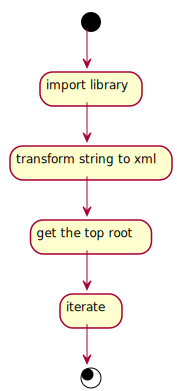

In [5]:
%%plantuml
@startuml
(*)--> "import library"
--> "transform string to tree"
--> "define selector"
--> "get selected elements of the tree"
-->(*)
@enduml

* Chrome개발자 도구 사용하기
    * xpath 또는 selector를 찾는 방법
        * Chrome을 열어서 > 보기 > 개발자정보 > 개발자도구 -> element
           * html tag를 누르면 맨 앞 ...가 생김
                * 이것을 누르면 팝업메뉴 > copy > xpath(또는 selector)
                
    * 검증하기
        * console
            * xpath
            ```
            $x('xpath')
            ```

            * HTML DOM querySelector() Method
            ```
            $('selector')
            ```

            * HTML DOM querySelectorAll() Method
            ```
            $$('selector all')
            ```

### 1.4.1 dom

* Document Object Model (DOM)
* HTML, XHTML, XML 문서를 계층구조인 트리구조로 만들어, 각 노드를 오브젝트로 사용하는 API.

* dom에서의 css selector 특정 요소 선택해 보기
    * dom의 querySelector()를 사용한다.
        * 아래 '.my'라는 클래스를 선택한다.
    * dom의 getElementById()를 사용한다.
        * 아래 '.p2'라는 클래스를 선택한다.

In [5]:
%%HTML
<html>
<body>

<h2 class="my">Turn this into blue</h2>

<button onclick="myFunction()">Click</button>

<script>
function myFunction() {
    document.querySelector(".my").style.backgroundColor = "blue";
}
</script>

</body>
</html>

* HTML javascript DOM
    * style of a <p> element

In [20]:
%%HTML
<html>
<body>

<p id="p2">Hello World!</p>

<script>
document.getElementById("p2").style.color = "RED";
</script>

<p>Hello World turned into RED!</p>

</body>
</html>

### 1.4.2 regex

* 정규식 regular expression은 문자열로 표현한 정규표현으로, 패턴매칭에 사용한다.
* 정규식을 사용하면 복잡한 패턴을 단순하게 처리

### 1.4.3 xpath

* xml문서를 트리구조로 표현하고, 노드를 선택하기 위해 사용하는 조회언어 (XML Path Language)
* xpath 표현

Expression | 설명
---------|----------
nodename | Selects all nodes with the name "nodename"
/ | Selects from the root node
// | Selects nodes in the document from the current node that match the selection no matter where they are
. | Selects the current node
.. | Selects the parent of the current node
@ | Selects attributes
\* | all


* xpath 사용예

xpath선택 | 결과
----------|----------
```$x('/html')``` | ```<html>...</html>```
```$x('/html/body')``` | ```<body>...</body>```
```$x('/html/body/div')``` | ```<div>...</div>```
```$x('/html/body/div/h1')``` | ```<h1>Example Domain</h1>```
```$x('/html/body/div/p')``` | ```<p>...</p>, <p>...</p>```
```$x('/html/body/div/p[1]')``` | ```<p>...</p>```
```$x('/html/body/div/p[2]')``` | ```<p>...</p>```


#### xml 파싱

* [위키에서 가져온 XML](https://en.wikipedia.org/wiki/XPath)

In [3]:
%%writefile my.xml
<?xml version="1.0" encoding="utf-8"?>
<wikimedia>
  <projects>
    <project name="Wikipedia" launch="2001-01-05">
      <editions>
        <edition language="English">en.wikipedia.org</edition>
        <edition language="German">de.wikipedia.org</edition>
        <edition language="French">fr.wikipedia.org</edition>
        <edition language="Polish">pl.wikipedia.org</edition>
        <edition language="Spanish">es.wikipedia.org</edition>
      </editions>
    </project>
    <project name="Wiktionary" launch="2002-12-12">
      <editions>
        <edition language="English">en.wiktionary.org</edition>
        <edition language="French">fr.wiktionary.org</edition>
        <edition language="Vietnamese">vi.wiktionary.org</edition>
        <edition language="Turkish">tr.wiktionary.org</edition>
        <edition language="Spanish">es.wiktionary.org</edition>
      </editions>
    </project>
  </projects>
</wikimedia>

Writing my.xml


* 파일에서 직접 파싱

In [13]:
import xml.etree.ElementTree as ET
tree=ET.parse('my.xml')
root=tree.getroot()
print root

<Element 'wikimedia' at 0x7f536c4ec990>


* 반복은 tree 또는 root에서 해도 된다. 아래는 tree에서 for문을 반복한다.

In [14]:
for node in tree.getiterator():
    print node.tag, node.attrib

wikimedia {}
projects {}
project {'name': 'Wikipedia', 'launch': '2001-01-05'}
editions {}
edition {'language': 'English'}
edition {'language': 'German'}
edition {'language': 'French'}
edition {'language': 'Polish'}
edition {'language': 'Spanish'}
project {'name': 'Wiktionary', 'launch': '2002-12-12'}
editions {}
edition {'language': 'English'}
edition {'language': 'French'}
edition {'language': 'Vietnamese'}
edition {'language': 'Turkish'}
edition {'language': 'Spanish'}


* 문자열에서 파싱 (파일에서 읽어온 내용을 문자열로 저장한 후)
    * 파일에서 읽어온 것은 '태그'가 아니라 '문자열'
    * 다시 말하면, 파싱이 완료된 '태그'가 아니라, 파싱을 해야 하는 '문자열'

In [3]:
f=open('my.xml')
xmlstr=f.read()
f.close()

In [4]:
print type(xmlstr)

<type 'str'>


In [5]:
print xmlstr

<?xml version="1.0" encoding="utf-8"?>
<wikimedia>
  <projects>
    <project name="Wikipedia" launch="2001-01-05">
      <editions>
        <edition language="English">en.wikipedia.org</edition>
        <edition language="German">de.wikipedia.org</edition>
        <edition language="French">fr.wikipedia.org</edition>
        <edition language="Polish">pl.wikipedia.org</edition>
        <edition language="Spanish">es.wikipedia.org</edition>
      </editions>
    </project>
    <project name="Wiktionary" launch="2002-12-12">
      <editions>
        <edition language="English">en.wiktionary.org</edition>
        <edition language="French">fr.wiktionary.org</edition>
        <edition language="Vietnamese">vi.wiktionary.org</edition>
        <edition language="Turkish">tr.wiktionary.org</edition>
        <edition language="Spanish">es.wiktionary.org</edition>
      </editions>
    </project>
  </projects>
</wikimedia>


In [15]:
import xml.etree.ElementTree as ET
tree=ET.fromstring(xmlstr)
for node in tree.getiterator():
    print node.tag, node.attrib

wikimedia {}
projects {}
project {'name': 'Wikipedia', 'launch': '2001-01-05'}
editions {}
edition {'language': 'English'}
edition {'language': 'German'}
edition {'language': 'French'}
edition {'language': 'Polish'}
edition {'language': 'Spanish'}
project {'name': 'Wiktionary', 'launch': '2002-12-12'}
editions {}
edition {'language': 'English'}
edition {'language': 'French'}
edition {'language': 'Vietnamese'}
edition {'language': 'Turkish'}
edition {'language': 'Spanish'}


* lxml을 사용한다.
    * xml라이브러리는 xpath를 지원하지 않는다.
    * 실행하는 단계는 다른 라이브러리를 사용하는 단계와 다르지 않다.


* 파일을 파싱하기

In [8]:
import lxml
import lxml.etree

tree=lxml.etree.parse('my.xml')
root=tree.getroot()

* lxml 라이브러리에서 문자열을 파싱할 때는 StringIO를 사용한다.
    * xml 라이브러리에서는 fromstring()함수를 사용했다.

In [16]:
import StringIO
tree=lxml.etree.parse(StringIO.StringIO(xmlstr))

In [17]:
for node in tree.getiterator():
    print node.tag, node.attrib

wikimedia {}
projects {}
project {'name': 'Wikipedia', 'launch': '2001-01-05'}
editions {}
edition {'language': 'English'}
edition {'language': 'German'}
edition {'language': 'French'}
edition {'language': 'Polish'}
edition {'language': 'Spanish'}
project {'name': 'Wiktionary', 'launch': '2002-12-12'}
editions {}
edition {'language': 'English'}
edition {'language': 'French'}
edition {'language': 'Vietnamese'}
edition {'language': 'Turkish'}
edition {'language': 'Spanish'}


* iterator를 사용할 수 있다.

In [19]:
treeiter=lxml.etree.iterparse(StringIO.StringIO(xmlstr))

In [20]:
type(treeiter)

lxml.etree.iterparse

In [21]:
for action, elem in treeiter:
    if not elem.text:
        text="None"
    else:
        text=elem.text
    print elem.tag+"=>"+text

edition=>en.wikipedia.org
edition=>de.wikipedia.org
edition=>fr.wikipedia.org
edition=>pl.wikipedia.org
edition=>es.wikipedia.org
editions=>
        
project=>
      
edition=>en.wiktionary.org
edition=>fr.wiktionary.org
edition=>vi.wiktionary.org
edition=>tr.wiktionary.org
edition=>es.wiktionary.org
editions=>
        
project=>
      
projects=>
    
wikimedia=>
  


* xpath
    * /wikimedia/projects/project/@name
        * /Wikimedia/projects/project/@name
    * //editions
    * /wikimedia/projects/project/editions/edition[@language='English']/text()
        * text of all edition elements where language attribute is equal to English).
    * /wikimedia/projects/project[@name='Wikipedia']/editions/edition/text()
        * text of all edition elements that exist under project element with a name attribute of Wikipedia

In [11]:
nodes = tree.xpath("/wikimedia/projects/project/@name")
print len(nodes)

2


In [62]:
for node in nodes:
    print node

Wikipedia
Wiktionary


In [23]:
nodes = tree.xpath("//editions/edition/text()")
print len(nodes)

10


In [24]:
for node in nodes:
    print node

en.wikipedia.org
de.wikipedia.org
fr.wikipedia.org
pl.wikipedia.org
es.wikipedia.org
en.wiktionary.org
fr.wiktionary.org
vi.wiktionary.org
tr.wiktionary.org
es.wiktionary.org


In [64]:
nodes = tree.xpath("/wikimedia/projects/project/editions/edition[@language='English']/text()")
print len(nodes)

2


In [65]:
for node in nodes:
    print node

en.wikipedia.org
en.wiktionary.org


In [66]:
nodes = tree.xpath("/wikimedia/projects/project[@name='Wikipedia']/editions/edition/text()")
print len(nodes)

5


In [67]:
for node in nodes:
    print node

en.wikipedia.org
de.wikipedia.org
fr.wikipedia.org
pl.wikipedia.org
es.wikipedia.org


### 1.4.4 css selectors

* CSS는 html의 스타일을 정하는 규칙을 가지고 있다. css selector는 첫 '{' 앞에 오는 selector로서 규칙이 적용되는 범위를 정한다.

* [css selectors](http://www.w3schools.com/cssref/css_selectors.asp)

type of selector | example | 설명
------------|------------|------------
[attribute] | |
type | div<br>p | match elements based on the name of their element type
class | .foo | class attributes of all elements 어느 요소이건 class 속성이 foo인 것을 선택
id | #foo | id foo (1개만 선택. 클래스는 여러 개 선택)
universal | * | all
descendents | a b | all b's inside a (여러 세대 떨어져도 선택)
child | a > b | b's only children to the a (1세대 다음)
parents | a ~ b | any parents of b (여러 세대 위)
grouped | h1, h2, h3 | h1 h2 h3
pesudo-class | a:link | a link 

* 설치
    ```
    sudo apt-get install libxml2-dev libxslt1-dev
    pip install lxml cssselect
    ```

* chrome console에서는 $$('selector')

In [3]:
%%HTML
<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <title>My Home Page</title>
    <style>
        h1 {text-align: center;
           color:red;
        };
    </style>
</head>
<body>
    <h1>안녕하십니까</h1>
    <p>오늘은 프로그래밍 하는 날...</p>
    <p>Today we do programming...</p>
</body>
</html>

* 위에서 만들어 놓은 ElementTree객체를 사용한다.
* css selector의 결과는 list이다.

In [22]:
type(tree)

lxml.etree._ElementTree

In [23]:
import lxml.html
from lxml.cssselect import CSSSelector

# construct a CSS Selector -> 
sel = CSSSelector('wikimedia')
# Apply the selector to the DOM tree.
nodes = sel(tree)
print type(nodes),len(nodes)

<type 'list'> 1


In [25]:
for node in nodes:
    print lxml.html.tostring(node)

<wikimedia>
  <projects>
    <project name="Wikipedia" launch="2001-01-05">
      <editions>
        <edition language="English">en.wikipedia.org</edition>
        <edition language="German">de.wikipedia.org</edition>
        <edition language="French">fr.wikipedia.org</edition>
        <edition language="Polish">pl.wikipedia.org</edition>
        <edition language="Spanish">es.wikipedia.org</edition>
      </editions>
    </project>
    <project name="Wiktionary" launch="2002-12-12">
      <editions>
        <edition language="English">en.wiktionary.org</edition>
        <edition language="French">fr.wiktionary.org</edition>
        <edition language="Vietnamese">vi.wiktionary.org</edition>
        <edition language="Turkish">tr.wiktionary.org</edition>
        <edition language="Spanish">es.wiktionary.org</edition>
      </editions>
    </project>
  </projects>
</wikimedia>


In [26]:
htmlstr="""<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>"""

In [27]:
import lxml.html
from lxml.cssselect import CSSSelector

_html = lxml.html.fromstring(htmlstr)

In [14]:
print lxml.html.tostring(_html)

<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>&#50504;&#45397;&#54616;&#49901;&#45768;&#44620;</h1>
<p>&#50724;&#45720;&#51008; &#54532;&#47196;&#44536;&#47000;&#48141; &#54616;&#45716; &#45216;...</p>
<p>Today we do programming...</p>
</body>
</html>


In [28]:
sel = CSSSelector('body  p')
nodes = sel(_html)
print nodes

[<Element p at 0x7f5354dc58e8>, <Element p at 0x7f5354dc5578>]


In [29]:
for node in nodes:
    print node.text

오늘은 프로그래밍 하는 날...
Today we do programming...


* chrom javascript console에서 selector를 복사해서 사용한다.
* nth-child(2)는 특정 child를 선택한다.

In [31]:
_html = lxml.html.fromstring(htmlstr)
sel = CSSSelector('body > p:nth-child(2)')
nodes = sel(_html)
print nodes

[<Element p at 0x7f5357ff1db8>]


In [32]:
for node in nodes:
    print node.text

오늘은 프로그래밍 하는 날...


In [34]:
_html = lxml.html.fromstring(htmlstr)
sel = CSSSelector('body > h1')
nodes = sel(_html)
print nodes

[<Element h1 at 0x7f5357ff9730>]


In [35]:
for node in nodes:
    print node.text

안녕하십니까


## 1.5 Srapy: Crawling framework

* 개요
    * 웹사이트 크롤링 프레임워크.
    * xpath, selector를 사용할 수 있다.
* 설치
    * 설치 요건 - python 2.7 or above 3.3, openssl, lxml, twisted
    * pip
        ```
        pip install scrapy
        ```
        
    * anaconda
        * anaconda prompt 단말을 열어서 명령어를 입력한다.
            ```
            C:\> conda install scrapy
            ```
            
        * anaconda prompt에서 scrapy shell을 입력하면 shell환경이 실행된다.
            ```
            C:\> scrapy shell
            In [1]:
            ```

* Scrapy shell을 이용한 문서 구조 파악
    * /usr/local/bin/scrapy를 실행
    ```
    $ scrapy shell http://stackoverflow.com
    >>> response.url
    >>> response.headers
    >>> response.xpath('//title')
    ```

* 크롤링 프로젝트 절차
    * 단계1: 프로젝트 생성
        * 프로젝트를 생성할 디렉토리로 이동
            ```
            cd mypjt
            scrapy startproject myspider
            ```
            * 1 'scrapy': 프레임워크를 사용
            * 2 'startproject': 프로젝트를 생성
            * 3 'myspider': 프로젝트 명칭
            * 4 크롤링 대상 도메인
        * 생성내용
            ```
            mypjt (내가 만듦)
            ├── myspider (디렉토리명은 내가 만듦, 안의 모든 파일들은 자동 생성)
            │   ├── __init__.py
            │   ├── items.py
            │   ├── pipelines.py
            │   ├── settings.py
            │   └── spiders
            │       ├── __init__.py
            |       └── hello.py (내가 만듦)
            └── scrapy.cfg
            ```

    * 단계2 'items.py': item 정의
        ```
        cd myspider/
        vim items.py
        ```
        
        * 클래스를 만들어 가져올 데이터 항목을 정의한다.
        
    * 단계3 'hello.py': Spider 클래스
        ```
        cd spiders/
        vim hello.py
        ```
        
        * 1 명칭은 프로젝트마다 다르게 명명한다.
        * 2 'start_urls'에서 시작
        * 3 parse()함수에서 원하는 항목을 추출
        
    * 단계4: 테스트
        ```
        scrapy crawl 또는
        scrapy crawl _myAppName (name="_myAppName", Spider 클래스에 정의된 명칭)
        ```
        
    * 단계5: 저장
        * pipeline을 이용해서 database에 저장할 수 있다.
        ```
        scrapy crawl _myAppName -o _myAppName.csv -t csv
        ```

* scrapy shell 연습 예제
    ```
    $ scrapy shell "https://data.go.kr"
    In [1]: response.xpath('//title/text()')
    Out[1]: [<Selector xpath='//title/text()' data=u'\uacf5\uacf5\ub370\uc774\ud130\ud3ec\ud138'>]

    In [2]: response.xpath('//title/text()').extract()
    Out[2]: [u'\uacf5\uacf5\ub370\uc774\ud130\ud3ec\ud138']

    In [3]: response.css('title').extract()
    Out[3]: [u'<title>\uacf5\uacf5\ub370\uc774\ud130\ud3ec\ud138</title>']
    ```

* 단순한 scrapy 예제
    * parse(response)
        * scrapy가 url에 대해 request(s)를 보내고, response(s)를 돌려받아서 parse()에서 처리한다.
        * response를 처리해서 item으로 넘겨주는 역할. urls이 여러 개 있는 경우 처리.

In [17]:
%%writefile src/ds_web_data_hello_scrapy.py
import scrapy

class myItem(scrapy.item.Item):
    title = scrapy.item.Field()

class myCrawler(scrapy.spiders.CrawlSpider):
    name = 'myAppName'
    start_urls = ['https://data.go.kr']
    def parse(self, response):
        item = myItem()
        #title = scrapy.selector.Selector(response).xpath('//title/text()')
        title = scrapy.selector.Selector(response).css('title').extract()
        print "---Hello---", title
        item['title']=title
        return item


Overwriting src/ds_web_data_hello_scrapy.py


* scrapy crawl은 프로젝트에서 사용하는 명령어, 프로젝트를 생성하지 않고 하나의 파일로 실습하였기 때문에 오류.

In [24]:
!scrapy crawl myAppName

Scrapy 1.1.0 - no active project

Unknown command: crawl

Use "scrapy" to see available commands


* scrapy 실행
    * scrapy runspider를 실행하면, 화면에 결과를 볼 수 있다. (윈도우에서 실행 ok!)
        ```
        scrapy runspider src/ds_web_data_hello_scrapy.py
        ```
        
    * 가져온 데이터는 --output에, 로그는 --logfile에 저장된다.    

In [9]:
!scrapy runspider src/ds_web_data_hello_scrapy.py

2016-09-17 08:50:41 [scrapy] INFO: Scrapy 1.1.0 started (bot: scrapybot)
2016-09-17 08:50:41 [scrapy] INFO: Overridden settings: {}
2016-09-17 08:50:41 [scrapy] INFO: Enabled extensions:
['scrapy.extensions.logstats.LogStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.corestats.CoreStats']
2016-09-17 08:50:41 [scrapy] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.DownloadTimeoutMiddleware',
 'scrapy.downloadermiddlewares.useragent.UserAgentMiddleware',
 'scrapy.downloadermiddlewares.retry.RetryMiddleware',
 'scrapy.downloadermiddlewares.defaultheaders.DefaultHeadersMiddleware',
 'scrapy.downloadermiddlewares.redirect.MetaRefreshMiddleware',
 'scrapy.downloadermiddlewares.httpcompression.HttpCompressionMiddleware',
 'scrapy.downloadermiddlewares.redirect.RedirectMiddleware',
 'scrapy.downloadermiddlewares.cookies.CookiesMiddleware',
 'scrapy.downloadermiddlewares.chun

In [18]:
!scrapy runspider src/ds_web_data_hello_scrapy.py --output='src/ds_web_data_hello.csv' -t csv --logfile='src/ds_web_data_hello.log'

---Hello--- [u'<title>\uacf5\uacf5\ub370\uc774\ud130\ud3ec\ud138</title>']


## 웹데이터-1: python.org 페이지를 크롤링해서 http url 출력하기

* 정적인 페이지 가져오기
* 사용자가 웹브라우저 주소창에 url을 입력하고 웹페이지 요청
* urllib vs urllib2 (py4inf 12장)
    * Python 3.x에서 urllib를 개정해서 1) urllib.request, 2) urllib.parse, 3) url lib.error로 나눔.
* urllib2.urlopen 
    * GET 또는 POST 방식으로 원격 url (html, 이미지, 파일 등)을 연다.
* 다음 방식으로 해 본다.
    * regex
    * BeautifulSoup
    * xpath
    * css selector

### html page 가져오기

* html을 가져오면 문자열이다. string, unicode이다.

In [1]:
import urllib
response = urllib.urlopen('http://python.org/')
_html = response.read()
print response.info()
print len(_html)

Server: nginx
Content-Type: text/html; charset=utf-8
X-Frame-Options: SAMEORIGIN
X-Clacks-Overhead: GNU Terry Pratchett
Content-Length: 47403
Accept-Ranges: bytes
Date: Tue, 04 Oct 2016 04:56:52 GMT
Via: 1.1 varnish
Age: 650
Connection: close
X-Served-By: cache-nrt6123-NRT
X-Cache: HIT
X-Cache-Hits: 3
Vary: Cookie
Public-Key-Pins: max-age=600; includeSubDomains; pin-sha256="WoiWRyIOVNa9ihaBciRSC7XHjliYS9VwUGOIud4PB18="; pin-sha256="5C8kvU039KouVrl52D0eZSGf4Onjo4Khs8tmyTlV3nU="; pin-sha256="5C8kvU039KouVrl52D0eZSGf4Onjo4Khs8tmyTlV3nU="; pin-sha256="lCppFqbkrlJ3EcVFAkeip0+44VaoJUymbnOaEUk7tEU="; pin-sha256="TUDnr0MEoJ3of7+YliBMBVFB4/gJsv5zO7IxD9+YoWI="; pin-sha256="x4QzPSC810K5/cMjb05Qm4k3Bw5zBn4lTdO/nEW/Td4=";
Strict-Transport-Security: max-age=63072000; includeSubDomains

47403


In [48]:
print type(_html)

<type 'str'>


### regex

In [3]:
import re
#p=re.compile('http://.+"')
p=re.compile('href="(http://.*?)"')
nodes=p.findall(_html)
print "http url은 몇 개?",len(nodes)
for node in nodes:
    print node

 http url은 몇 개? 46
http://www.ie6countdown.com/
http://browsehappy.com/
http://www.google.com/chromeframe/?redirect=true
http://plus.google.com/+Python
http://www.facebook.com/pythonlang?fref=ts
http://twitter.com/ThePSF
http://brochure.getpython.info/
http://wiki.python.org/moin/Languages
http://python.org/dev/peps/
http://planetpython.org/
http://pyfound.blogspot.com/
http://pycon.blogspot.com/
http://docs.python.org/3/tutorial/introduction.html#using-python-as-a-calculator
http://blog.python.org
http://feedproxy.google.com/~r/PythonInsider/~3/ZLTGxjKhYp0/python-core-development-sprint-2016-36.html
http://feedproxy.google.com/~r/PythonInsider/~3/6vXS6z9YHg0/python-360-beta-1-is-now-available.html
http://feedproxy.google.com/~r/PythonInsider/~3/ukG8L0FEq2Q/python-360-alpha-4-preview-release-is.html
http://feedproxy.google.com/~r/PythonInsider/~3/6i6vUY_x_SE/python-360-alpha-3-preview-release-is.html
http://feedproxy.google.com/~r/PythonInsider/~3/1zUlkKxW27U/python-2712-released.html


* regex를 사용해서 태그 값을 가져오기
    * library를 사용하면 보다 간편하게 가져올 수 있지만, 배운 regex를 이용해보자.
    * h1 태그
    * p 태그

In [4]:
import re
p=re.compile('<h1>(.*?)</h1>')
h1tags=p.findall(_html)
for tag in h1tags:
    print tag

Functions Defined
Compound Data Types
Intuitive Interpretation
Quick &amp; Easy to Learn
All the Flow You&rsquo;d Expect


In [4]:
import re
p=re.compile('<p>(.*?)</p>')
ptags=p.findall(_html)

In [3]:
print len(ptags)

18


In [5]:
print ptags[0]

<strong>Notice:</strong> While Javascript is not essential for this website, your interaction with the content will be limited. Please turn Javascript on for the full experience. 


In [6]:
#for i in ptags:
    #print i

### BeautifulSoup

* 태그를 파싱하는 라이브러리
* 설치
    * 윈도우 아나콘다창 또는 맥/리눅스 Terminal에서
    
    ```sudo pip install BeautifulSoup```
* 위 예제, p 태그의 처음에 있는 strong 태그 가져오기


In [42]:
from bs4 import BeautifulSoup
tree=BeautifulSoup(_html, "lxml")
strongtags=tree('strong')
for tag in strongtags:
    print tag

<strong>Notice:</strong>
<strong><small>A</small> A</strong>
<strong>relaunched community-run job board</strong>


* 추가

In [39]:
from urllib import urlopen
from bs4 import BeautifulSoup
_html = urlopen("http://en.wikipedia.org/wiki/Kevin_Bacon")
tree = BeautifulSoup(_html, "lxml")
for link in tree.findAll("a"):
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/Wikipedia:Protection_policy#semi
#mw-head
#p-search
/wiki/Kevin_Bacon_(disambiguation)
/wiki/File:Kevin_Bacon_SDCC_2014.jpg
/wiki/San_Diego_Comic-Con_International
/wiki/Philadelphia
/wiki/Pennsylvania
/wiki/Actor
/wiki/Film_director
/wiki/Film_producer
/wiki/Musician
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
/wiki/Michael_Bacon_(musician)
http://www.baconbros.com/
#cite_note-1
#cite_note-actor-2
/wiki/Footloose_(1984_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Fox_Broadcasting_Company
/wiki/The_Following
/wiki/Golden_Globe_Award
/wiki/Screen_Actors_Guild_Awards
/wiki/Primetime_Emmy_Award
/wiki/The_Guardian
/wiki/Academy_Award
#cite_note-3
/wiki/Hollywood_Walk_of_Fame
/wiki/Social_networks
/wiki/Six_Degrees_of_Kevin_Bacon
/wiki/SixDegrees.org
#cite_note-walk-4
#Early_life_and_education
#Acting_career
#Early_work
#1980s
#1990s
#2000s
#2010s
#Advertising_work
#Personal_life
#Six_Degrees_of_Kevin_Bacon
#Music
#Awards_and_nominations

### xpath, css selector를 Chrom javascript console에서 확인해보자.

* xpath
    ```
    $x('//*[@href]')
    ```
* css select
    ```
    $$('a[href]')
    ```

### xpath로 해보기

* lxml로 html을 파싱해서 자료 가져오기 (위에서 읽어온 html 변수를 사용)

In [61]:
print len(_html)

47423


In [7]:
from lxml import etree
_htmlTree = etree.HTML(_html)
result = etree.tostring(_htmlTree, pretty_print=True, method="html")

In [9]:
print len(result)

47357


In [64]:
nodes = _htmlTree.xpath('//*[@href]')
print len(nodes)

206


In [65]:
for node in nodes:
    print node.attrib

{'href': '//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js', 'rel': 'prefetch'}
{'href': '/static/stylesheets/style.css', 'type': 'text/css', 'rel': 'stylesheet', 'title': 'default'}
{'media': 'not print, braille, embossed, speech, tty', 'href': '/static/stylesheets/mq.css', 'type': 'text/css', 'rel': 'stylesheet'}
{'href': '/static/favicon.ico', 'type': 'image/x-icon', 'rel': 'icon'}
{'href': '/static/apple-touch-icon-144x144-precomposed.png', 'rel': 'apple-touch-icon-precomposed', 'sizes': '144x144'}
{'href': '/static/apple-touch-icon-114x114-precomposed.png', 'rel': 'apple-touch-icon-precomposed', 'sizes': '114x114'}
{'href': '/static/apple-touch-icon-72x72-precomposed.png', 'rel': 'apple-touch-icon-precomposed', 'sizes': '72x72'}
{'href': '/static/apple-touch-icon-precomposed.png', 'rel': 'apple-touch-icon-precomposed'}
{'href': '/static/apple-touch-icon-precomposed.png', 'rel': 'apple-touch-icon'}
{'href': '/static/humans.txt', 'rel': 'author'}
{'href': '#content', 'titl

### css selector

In [5]:
import lxml.html
from lxml.cssselect import CSSSelector
import requests
r = requests.get('http://python.org/')

html = lxml.html.fromstring(r.text)
sel=CSSSelector('a[href]')
# Apply the selector to the DOM tree.
nodes = sel(html)

In [7]:
print len(nodes)
for node in nodes:
    #print lxml.html.tostring(item)
    print node.get('href'), node.text

196
#content Skip to content
#python-network 
                    
/ Python
/psf-landing/ PSF
https://docs.python.org Docs
https://pypi.python.org/ PyPI
/jobs/ Jobs
/community/ Community
#top 
                    
/ None
#site-map None
# None
javascript:; Smaller
javascript:; Larger
javascript:; Reset
# Socialize
http://plus.google.com/+Python None
http://www.facebook.com/pythonlang?fref=ts None
http://twitter.com/ThePSF None
/community/irc/ None
/accounts/login/ Sign In
/accounts/signup/ Sign Up / Register
/accounts/login/ Sign In
/about/ About
/about/apps/ Applications
/about/quotes/ Quotes
/about/gettingstarted/ Getting Started
/about/help/ Help
http://brochure.getpython.info/ Python Brochure
/downloads/ Downloads
/downloads/ All releases
/downloads/source/ Source code
/downloads/windows/ Windows
/downloads/mac-osx/ Mac OS X
/download/other/ Other Platforms
https://docs.python.org/3/license.html License
/download/alternatives Alternative Implementations
/doc/ Documentation
/doc/ Doc

## 웹데이터-2: 웹파일을 가져와서 자료구조에 넣기

* uci 기계학습 데이터 파일 읽기
* 로컬 파일을 읽는 것과 비교
* 전체 문자 수는 25,437
* 데이터는 300행 x 28열

In [29]:
import urllib2
url='http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
res=urllib2.urlopen(url)
html = res.read()
res.close()
print len(html)

25437


In [30]:
lines=html.splitlines()
data=[]
for line in lines:
    data.append(line.split())
print len(data), len(data[0])
print data[0]

300 28
['2', '1', '530101', '38.50', '66', '28', '3', '3', '?', '2', '5', '4', '4', '?', '?', '?', '3', '5', '45.00', '8.40', '?', '?', '2', '2', '11300', '00000', '00000', '2']


### 데이터 확인

* 모든 300행에대해 28개 컬럼이 있는지
* 처음 20개만 3번째 컬럼 평균내보기

In [56]:
for i in range(0,len(data)):
    if len(data[i]) != len(data[0]):
        print "wrong size at", i

In [57]:
for i in range(0,20):
    print data[i][3]

38.50
39.2
38.30
39.10
37.30
?
37.90
?
?
38.30
38.10
39.10
37.20
38.00
38.2
37.60
?
37.50
37.60
39.4


In [52]:
sum=0
cnt=0
for i in range(0,20):
    val=data[i][3]
    if val is '?':
        print i,"None"
    else:
        sum+=float(val)
        cnt+=1
        print i,val, sum
average=float(sum/cnt)
print "count={0} sum={1} average={2:2.2f}".format(cnt,sum,average)

0 38.50 38.5
1 39.2 77.7
2 38.30 116.0
3 39.10 155.1
4 37.30 192.4
5 None
6 37.90 230.3
7 None
8 None
9 38.30 268.6
10 38.10 306.7
11 39.10 345.8
12 37.20 383.0
13 38.00 421.0
14 38.2 459.2
15 37.60 496.8
16 None
17 37.50 534.3
18 37.60 571.9
19 39.4 611.3
count=16 sum=611.3 average=38.21


## 웹데이터-3: wiki에서 'python'으로 검색해서 http url 출력하기

* 앞 문제에서는 정적 페이지를 읽었고, 여기서는 검색어를 사용한 request
* urllib을 사용해서 처리하면 오류, 웹브라우저를 열어서 하면 ok
* 이유는 header를 설정하지 않아서 그렇다.

In [58]:
from urllib import urlopen
keyword='python'
resp = urlopen('https://www.google.com/search?q='+keyword)
html=resp.read()
len(html)

5503

In [59]:
import re
p=re.compile('.*(error).*')
print p.search(html).group(1)

error


In [61]:
import webbrowser
webbrowser.open('http://www.google.com/search?q=python')

True

### headers

* user agent
    * Python에서 사용하는 기본 User Agent는 'a User-Agent header of urllib/VVV' (urllib 버전코드)
    * 이런 User Agent를 사용하면 에러가 발생할 수 있슴.
    
Headers | example from my browser
---|---
User-Agent | Python-urllib/1.17


* 형식
    ```Mozilla/[version] ([system and browser information]) [platform] ([platform details]) [extensions]```
    * Safari on the iPad
    ```Mozilla/5.0 (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Mobile/7B40```
    * Mozilla/5.0: Previously used to indicate compatibility with the Mozilla rendering engine.
    * (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us): Details of the system in which the browser is running.
    * AppleWebKit/531.21.10: The platform the browser uses.
    * (KHTML, like Gecko): Browser platform details.
    * Mobile/7B405: This is used by the browser to indicate specific enhancements that are available directly in the browser or through third parties. An example of this is Microsoft Live Meeting which registers an extension so that the Live Meeting service knows if the software is already installed, which means it can provide a streamlined experience to joining meetings.
* user agent 확인
https://www.whatismybrowser.com/detect/what-is-my-user-agent

* 리눅스 Firefox의 User Agent 예
```Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:42.0) Gecko/20100101 Firefox/42.0```
* 맥 Safari의 User Agent 예
```Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.7 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.7```

In [45]:
import requests

resp = requests.head("http://www.google.com")
print resp.status_code, resp.text, resp.headers

302  {'Date': 'Sat, 17 Sep 2016 11:55:01 GMT', 'Content-Length': '261', 'Content-Type': 'text/html; charset=UTF-8', 'Location': 'http://www.google.co.kr/?gfe_rd=cr&ei=FS_dV_ayN5SL8Qfcn5jYCA', 'Cache-Control': 'private'}


In [46]:
import urllib2
class HeadRequest(urllib2.Request):
     def get_method(self):
         return "HEAD"

response = urllib2.urlopen(HeadRequest("http://google.com/index.html"))
print response.info()
print response.geturl()

Date: Sat, 17 Sep 2016 11:55:22 GMT
Expires: -1
Cache-Control: private, max-age=0
Content-Type: text/html; charset=EUC-KR
P3P: CP="This is not a P3P policy! See https://www.google.com/support/accounts/answer/151657?hl=en for more info."
Server: gws
X-XSS-Protection: 1; mode=block
X-Frame-Options: SAMEORIGIN
Set-Cookie: NID=86=Q13BVpGI56Z55G9bCM64OCG0aKj7Rw3H8F-xj-vt1R3WkUW4lKXeKbBaHQwH6nbnPeo5OsKAijPw0d7wD1NzNFFVDHkznuusIegItoGoVexDaJpj2IFK2DglzvaewY2a; expires=Sun, 19-Mar-2017 11:55:22 GMT; path=/; domain=.google.co.kr; HttpOnly
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close

http://www.google.co.kr/index.html?gfe_rd=cr&ei=Ki_dV6yADofR8gfvoYO4BQ


In [47]:
# 파이썬에서 사용하는 기본 User Agent
from urllib import URLopener
URLopener.version

'Python-urllib/1.17'

* defining my own UA

In [48]:
# 연습으로 자신의 User Agent 설정
from urllib import FancyURLopener
class MyOpener(FancyURLopener):
    version = 'My new User-Agent'
MyOpener.version

'My new User-Agent'

In [49]:
# 리눅스 Firefox User Agent 예
# 맥 Safari User Agent 예
class MyOpener(FancyURLopener):
    #version = 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:42.0) Gecko/20100101 Firefox/42.0'
    version = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.7 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.7'
MyOpener.version

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.7 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.7'

In [50]:
myopener = MyOpener()
page = myopener.open('http://www.google.com/search?q=python')
html=page.read()

In [51]:
import os
f=open('mygoogle.html','w')
f.write(html)
f.close()
import webbrowser
mygoogle='file://'+'localhost'+os.path.join(os.getcwd(), 'mygoogle.html')
print mygoogle
webbrowser.open(mygoogle)

file://localhost/home/jsl/Code/git/bb/jsl/pyds/mygoogle.html


True

* http로 하면 결과가 없다.
    ```
    p=re.compile('href="(http://.*?)"')
    ```

In [52]:
import re

p=re.compile('href="(https://.*?)"')
#p=re.compile('.*href.*')
res=p.findall(html)
print len(res)
for item in res:
    print item[:100]

50
https://www.google.co.kr/intl/ko/options/
https://accounts.google.com/ServiceLogin?hl=ko&amp;passive=true&amp;continue=https://www.google.co.k
https://www.google.com/url?q=/chrome/browser/desktop/index.html%3Fhl%3Dko%26brand%3DHLDY%26utm_sourc
https://www.google.co.kr/webhp?hl=ko&amp;sa=X&amp;ved=0ahUKEwiPrpScrJbPAhUBX5QKHZLSDg4QPAgD
https://www.python.org/
https://www.python.org/
https://www.python.org/
https://webcache.googleusercontent.com/search?q=cache:Fvb7Gz_c4rwJ:https://www.python.org/+&amp;cd=2
https://translate.google.co.kr/translate?hl=ko&amp;sl=en&amp;u=https://www.python.org/&amp;prev=sear
https://www.python.org/downloads/
https://www.python.org/about/gettingstarted/
https://www.python.org/doc/
https://docs.python.org/
https://www.python.org/downloads/windows/
https://wiki.python.org/moin/BeginnersGuide
https://ko.wikipedia.org/wiki/%ED%8C%8C%EC%9D%B4%EC%8D%AC
https://webcache.googleusercontent.com/search?q=cache:OL25IRr7kSMJ:https://ko.wikipedia.org/wiki/%25
https://wi

In [ ]:
import urllib2
import urllib
googleurl = 'https://www.google.com/search'
keyValues = {'q' : 'python programming tutorials'}
request = urllib.urlencode(keyValues)
print request
request = request.encode('utf-8') # data should be bytes

In [56]:
req = urllib2.Request(googleurl+'?'+request)
print req

print req.get_full_url()

print req.get_method

<urllib2.Request instance at 0x7f0847d66320>
https://www.google.com/search?q=python+programming+tutorials
<bound method Request.get_method of <urllib2.Request instance at 0x7f0847d66320>>


* forbidden error

In [ ]:
resp = urllib2.urlopen(req)
resp = myopener.open(req)
html = resp.read()

### wiki에서 읽기

In [14]:
import urllib
keyword='Albert_Einstein'
keyword='Python (programming language)'
s = urllib.urlopen('http://en.wikipedia.org/w/index.php?action=raw&title='+keyword).read()
#print s.find('Python is a widely used general-purpose')
print s[:5000]


{{About|the programming language|the genus and other uses|Python (disambiguation)}}
{{Use dmy dates|date=August 2015}}
{{Infobox programming language
|name                   = Python
|logo                   = Python logo and wordmark.svg
|logo_size              = 260px
|paradigm               = [[multi-paradigm programming language|multi-paradigm]]: [[object-oriented programming|object-oriented]], [[imperative programming|imperative]], [[functional programming|functional]], [[procedural programming|procedural]], [[reflective programming|reflective]]
|year                   = {{Start date and age|df=yes|1991}}
|designer               = [[Guido van Rossum]]
|developer              = [[Python Software Foundation]]
|latest_release_version = 3.5.0 /<br>{{Start date|df=yes|2015|09|13}}<ref>{{cite web |url=https://docs.python.org/3/whatsnew/3.5.html |title=Python 3.5.0 |publisher=Python Software Foundation |accessdate=13 September 2015}}</ref><br>2.7.10 /<br>{{Start date|df=yes|2015|05|23}}<r

### 위키에서 css.selector

In [26]:
import lxml.html
from lxml.cssselect import CSSSelector
import requests

r = requests.get('https://en.wikipedia.org/wiki/Python_(programming_language)')
# build the DOM Tree
tree = lxml.html.fromstring(r.text)
# print the parsed DOM Tree
#print lxml.html.tostring(tree)

* Chrome javascript console > 태그 하이라이트 > '...'에서 오른쪽 버튼 > copy > copy selector

In [27]:
sel = CSSSelector('#mw-content-text > div:nth-child(1)')
# Apply the selector to the DOM tree.
results = sel(tree)
print results

[<Element div at 0x7f084c6a54c8>]


In [34]:
# print the HTML for the first result.
match = results[0]
print lxml.html.tostring(match)

<div role="note" class="hatnote">This article is about the programming language. For the genus and other uses, see <a href="/wiki/Python_(disambiguation)" class="mw-redirect mw-disambig" title="Python (disambiguation)">Python (disambiguation)</a>.</div>



In [36]:
# print the text of the first result.
print match.text

This article is about the programming language. For the genus and other uses, see 


In [44]:
for result in results:
    print result.text

This article is about the programming language. For the genus and other uses, see 


## 웹데이터-4: 한국 포털사이트에서 노래제목을 검색

* naver에서 가져오기
* regex, css selector

### regex

In [9]:
import urllib
keyword='비오는'
f = urllib.urlopen("http://music.naver.com/search/search.nhn?query="+keyword+"&x=0&y=0")
mydata = f.read();

In [10]:
pos = mydata.find("트랙 리스트")
if (pos>0):
    pos = mydata.find("_title title NPI=", pos);
    pos = mydata.find("title=",pos+20)
    pos2 = mydata.find("\"", pos+8)
    print "---",mydata[pos+7:pos2]
print len(mydata)

--- 비 오는 거리
131067


In [11]:
import re
p=re.compile('title=".*비.?오는.*"')
#res=p.search(data)
res=p.findall(mydata)
for item in res:
    print item

title="검색어 입력" value="비오는" maxlength="50" accesskey="s"
title="비오는날" alt="비오는날"
title="비오는 금요일" alt="비오는 금요일"
title="비 오는 거리" ><span class="ellipsis"
title="1집 비오는 거리" class="_album NPI=a:album,r:1,i:682"><span class="ellipsis"
title="비오는 날 수채화" ><span class="ellipsis"
title="비오는 날 수채화 1 OST" class="_album NPI=a:album,r:2,i:33001"><span class="ellipsis"
title="비 오는 날" ><span class="ellipsis"
title="비 오는 날" class="_album NPI=a:album,r:3,i:656486"><span class="ellipsis"
title="비오는날 (동요) (멜로디 MR)" ><span class="ellipsis"
title="비오는 거리" ><span class="ellipsis"
title="비오는 밤에" ><span class="ellipsis"
title="비오는 날 (Inst.)" ><span class="ellipsis"
title="비오는 날" class="_album NPI=a:album,r:7,i:649010"><span class="ellipsis"
title="비오는 남산" ><span class="ellipsis"
title="비 오는 거리  (Feat. 핫펠트)" ><span class="ellipsis"
title="비오는 압구정" ><span class="ellipsis"
title="비오는 날은 푸르다" ><span class="ellipsis"
title="비오는 날은 푸르다" class="_album NPI=a:album,r:11,i:660894"><span class="ellipsis"
title="김현주의 비오는 거

### css selector

* selector 1: 맨 처음부터 가면
    * 위부터 따라가면
        ```
        body > #wrap > div.fix_conts > #container > .container_inner > #content
        ```
    * 다음 계속 이어가면
        ```
        #content > div:nth-child(4) 
        > div._tracklist_mytrack.tracklist_table.tracklist_type1._searchTrack
        > table > tbody > tr:nth-child(2) > td.name
        ```
    * 제목까지 읽으면
        ```
        #content > div:nth-child(4) 
        > div._tracklist_mytrack.tracklist_table.tracklist_type1._searchTrack
        > table > tbody > tr:nth-child(2) > td.name > a.title
        ```
     * 주요 selector 설명

CSS selectors | 설명
----------|----------
#content | id가 content인 element를 선택
#content > div:nth-child(4)' | 상위 #content의 4번째 div를 선택
div._tracklist_mytrack | div아래 _tracklist_mytrack 클래스를 선택

* selector 2: 앞은 건너뛰고 table부터 쓰면 (중간부터 쓰니까, 속성을 사용해서 시작함)
    ```
    'table[summary] > tbody > ._tracklist_move > .name > a.title'
    ```
    
    * selector 설명

CSS selectors | 설명
----------|----------
table[summary] | table summary 선택
a.title | a link의 title을 선택


#### 전체 css selector 사용하기

* 제목 1개 출력하기

In [12]:
import lxml.html
from lxml.cssselect import CSSSelector

html = lxml.html.fromstring(mydata)
#tree=lxml.etree.parse('myhtml')
# construct a CSS Selector -> 
sel = CSSSelector('#content > div:nth-child(4) \
    > div._tracklist_mytrack.tracklist_table.tracklist_type1._searchTrack \
    > table > tbody > tr:nth-child(2) > td.name > a.title')
# Apply the selector to the DOM tree.
nodes = sel(html)

In [13]:
len(nodes)

1

In [14]:
for node in nodes:
    #print lxml.html.tostring(item)
    print node.text_content()

비 오는 거리


* 모든 제목 출력하기

In [15]:
import lxml.html
from lxml.cssselect import CSSSelector

html = lxml.html.fromstring(mydata)
#tree=lxml.etree.parse('myhtml')
# construct a CSS Selector -> 
sel = CSSSelector('#content > div:nth-child(4) \
    > div._tracklist_mytrack.tracklist_table.tracklist_type1._searchTrack \
    > table > tbody > tr > td.name > a.title')
# Apply the selector to the DOM tree.
nodes = sel(html)

for node in nodes:
    #print lxml.html.tostring(item)
    print node.text_content()

비 오는 거리
비오는 날 수채화
비 오는 날
비오는날 (동요) (멜로디 MR)
비오는 거리
비오는 밤에
비오는 날 (Inst.)
비오는 남산
비 오는 거리  (Feat. 핫펠트)
비오는 압구정
비오는 날은 푸르다
One More Time
비 오는 날의 수채화
Yesterday (비틀즈 예스터 데이 : CF `시몬스침대`)
비오는날 수채화 (발라드 Ver.) (With 김명상, 강윤식)


#### 일부 css selector 사용하기

In [16]:
import lxml.html
import requests

keyword='비오는'
r = requests.get("http://music.naver.com/search/search.nhn?query="+keyword+"&x=0&y=0")

_html = lxml.html.fromstring(r.text)

* html을 보려면
    * r.text로 보거나
    * lxml.html.tostring(_html)

In [11]:
len(lxml.html.tostring(_html))

149317

In [17]:
from lxml.cssselect import CSSSelector

sel = CSSSelector('table[summary] > tbody > ._tracklist_move > .name > a.title')
# Apply the selector to the DOM tree.
nodes = sel(_html)

In [18]:
len(nodes)

15

* item.text()는 한글 문자 출력 오류
* item.text_content()를 사용해서 출력

In [19]:
for node in nodes:
    #print lxml.html.tostring(item)
    print node.text_content()

비 오는 거리
비오는 날 수채화
비 오는 날
비오는날 (동요) (멜로디 MR)
비오는 거리
비오는 밤에
비오는 날 (Inst.)
비오는 남산
비 오는 거리  (Feat. 핫펠트)
비오는 압구정
비오는 날은 푸르다
One More Time
비 오는 날의 수채화
Yesterday (비틀즈 예스터 데이 : CF `시몬스침대`)
비오는날 수채화 (발라드 Ver.) (With 김명상, 강윤식)


* 곡명, 아티스트, 앨범 모두 가져오기
    * html이 정형적이지 않아서 어렵다.
    * 2단계 작업.
        * 곡명, 아티스트, 앨범 항목을 가지고 있는 상위 태그를 먼저 선정하고, 그 안의 개별 항목을 선정한다.

In [20]:
from lxml.cssselect import CSSSelector

sel = CSSSelector('table[summary] > tbody > ._tracklist_move')
# Apply the selector to the DOM tree.
nodes = sel(_html)
print lxml.html.tostring(nodes[0])

<tr class="_tracklist_move {TRACK_TYPE}" style="display:none;" trackdata="{TRACK_DATA}">


						
							<td class="chk"><input type="checkbox" title="&#49440;&#53469;" class="_chkbox_item input_chk {TRACK_CHECK_NCLICKS}"> </td>
						
						
							<td class="order">{TRACK_NUM}</td>
						
							<td class="name">

								{PLAY_TOGGLE}
								{ADD_TOGGLE}


								<span class="_ico_title ico_title"><img height="18" width="23" alt="TITLE" src="http://static.naver.net/nmusic/201008/blank.gif"></span>
								<span class="_ico_19 ico19"><img height="18" width="13" src="http://static.naver.net/nmusic/201008/blank.gif"></span>


								{TRACK_SONG_NAME}

							</td>

							<td class="_artist artist {NO_ELL}">


                                   {ARTIST}

							</td>

						
                            <td class="album">
                                {ALBUM}
                            </td>
                        
                        
                        	<td class="like

* 개별 항목의 선정
* 우선 1개씩 해 본다.
    * results[0]은 제목행이므로, 그 다음을 처리한다.
    * 태그가 정형적이지 않으므로, selector가 일정하지 않다는 점에 주의한다.
        * Chrome console창을 이용해서 하나씩 작업하므로, selector를 정의하는데 노력이 수반된다.

In [21]:
_selName = CSSSelector('.name > a.title')
_selArtist = CSSSelector('._artist.artist')
_selAlbum= CSSSelector('.album > a')
_name=_selName(nodes[1])
_artist=_selArtist(nodes[1])
_album=_selAlbum(nodes[1])

In [22]:
print _name[0].text_content()
print _artist[0].text_content().strip()
print _album[0].text_content()

비 오는 거리
이승훈
1집 비오는 거리


* 반복문을 이용하여 모든 노래를 출력한다.
    * if문은 노래제목이 있는 없는 경우 제거한다 (제목 행을 제거하는 효과)

In [23]:
_selName = CSSSelector('.name > a.title')
_selArtist = CSSSelector('._artist.artist')
_selAlbum= CSSSelector('.album > a')
for node in nodes:
    #print lxml.html.tostring(item)
    _name=_selName(node)
    _artist=_selArtist(node)
    _album=_selAlbum(node)
    if _name:
        print _artist[0].text_content().strip(),
        print "---",
        print _name[0].text_content(),
        print "---",
        print _album[0].text_content()


이승훈 --- 비 오는 거리 --- 1집 비오는 거리
강인원 --- 비오는 날 수채화 --- 비오는 날 수채화 1 OST
오소연 --- 비 오는 날 --- 비 오는 날
동요시대 --- 비오는날 (동요) (멜로디 MR) --- 동요 MR반주 5
서영은 --- 비오는 거리 --- 1집 Romantic 1
루드 페이퍼(Rude Paper) --- 비오는 밤에 --- 1집 Paper Spectrum
김민우 --- 비오는 날 (Inst.) --- 비오는 날
조영순 --- 비오는 남산 --- 무진장 트롯트 골든 1＆2
베이빌론(Babylon) --- 비 오는 거리  (Feat. 핫펠트) --- BETWEEN US
브라운 아이즈 --- 비오는 압구정 --- 2집 Reason 4 Breathing?
하이니(Hi.ni) --- 비오는 날은 푸르다 --- 비오는 날은 푸르다
Richard Marx --- One More Time --- 김현주의 비오는 거리
SG 워너비 --- 비 오는 날의 수채화 --- Classic Odyssey
Romantisch Jazzkapelle --- Yesterday (비틀즈 예스터 데이 : CF `시몬스침대`) --- 뉴에이지 연가 : 비 오는 날의 거리, 추억, 그리고 아름다운 재즈 피아노(Pop 올드 팝, 클래식, 영화 OST 베스트 연주 음악)
강윤식 --- 비오는날 수채화 (발라드 Ver.) (With 김명상, 강윤식) --- 1980-2010 리뉴얼 - 내 노래 다시 부르기


## 웹데이터-5 : 국제학회 목록을 크롤링하기

* html -> css.select
* [IEEE국제학회](https://www.ieee.org/conferences_events/index.html)

* 크롬 브라우저 > 보기 > 개발자 정보 > javascript console
    * 제일 맨 위 body > #outer-container를 클릭
        ```
        '#inner-container > div.content-gray > div.content-lc \
            > div.content-lc-bottom > div.content-c > div:nth-child(1) > div \
            > div:nth-child(2)'
        ```
   * div 밑 모든 항목을 선택하도록 수정 (css all items inside div)a
        ```
        '#inner-container > div.content-gray > div.content-lc \
            > div.content-lc-bottom > div.content-c > div:nth-child(1) > div \
            > div > *')
        ``` 
    
    1. retreive html page | string or unicode
    2. parsing string to tags | tags | lxml.html.fromstring(html)
    3. select | selected tags

In [1]:
import lxml.html
from lxml.cssselect import CSSSelector
import requests
r = requests.get('https://www.ieee.org/conferences_events/index.html')

html = lxml.html.fromstring(r.text)

In [25]:
print lxml.html.tostring(html)

<html lang="en-us" xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-us">
<head><meta http-equiv="content-type" content="text/html; charset=iso-8859-1"><script type="text/javascript">
   var _U = "undefined";
   var g_HttpRelativeWebRoot = "/ucm/";
   var SSContributor = false;
   var SSForceContributor = false;
   var SSHideContributorUI = false;
   var ssUrlPrefix = "/";
   var ssUrlType = "1";
   var ssDomainNum = "f5d7bee6";
   var g_navNode_Path = new Array();
       g_navNode_Path[0] = '2';
       g_navNode_Path[1] = '39';
   var g_ssSourceNodeId = "39";
   var g_ssSourceSiteId = "ieee";
   var g_strLanguageId = "en";
</script>
<script id="SSNavigationFunctionsScript" type="text/javascript" src="/ucm/websites/ieee/sitenavigationfunctions.js"></script>
<script id="SSNavigationScript" type="text/javascript" src="/ucm/websites/ieee/sitenavigation.js"></script>

	<script type="text/javascript" src="/ucm/resources/wcm/sitestudio/wcm.toggle.js"></script>
	<script type="text/javascript"

* 2번째 행부터 데이터가 시작된다. 2번째 행을 가져오는 css.selecor -> 데이터를 모두 가져옴!!!??

In [26]:
sel=CSSSelector('#inner-container > div.content-gray > div.content-lc \
        > div.content-lc-bottom > div.content-c > div:nth-child(1) > div \
        > div:nth-child(2)')
# Apply the selector to the DOM tree.
nodes = sel(html)
for node in nodes:
    print lxml.html.tostring(node)

<div><p></p><p><a target="" href="http://www.ieee.org/conferences_events/conferences/conferencedetails/index.html?Conf_ID=20214&amp;WT.mc_id=con_mmm_16">2016 Annual Conference on Magnetism and Magnetic Materials (MMM)</a><br> New Orleans, LA, USA | 31 October - 4 November 2016</p> <p><a target="" href="http://www.ieee.org/conferences_events/conferences/conferencedetails/index.html?Conf_ID=34402&amp;WT.mc_id=con_sen_16">2016 IEEE SENSORS</a><br> Orlando, FL, USA | 30 October - 3 November 2016</p> <p><a target="" href="http://www.ieee.org/conferences_events/conferences/conferencedetails/index.html?Conf_ID=31456&amp;WT.mc_id=con_nss_16">2016 IEEE Nuclear Science Symposium, Medical Imaging Conference and  Room-Temperature Semiconductor Detector Workshop (NSS/MIC/RTSD)</a><br> Strasbourg, France | 29 October - 6 November 2016</p> <p><a target="" href="http://www.ieee.org/conferences_events/conferences/conferencedetails/index.html?Conf_ID=36434&amp;WT.mc_id=con_appeec_16">2016 IEEE PES Asia-

* 마지막 div 아래 모든 a를 가져오도록 수정함.

In [27]:
#sel = CSSSelector('#inner-container > div.content-gray > div.content-lc > div.content-lc-bottom > div.content-c')
sel=CSSSelector('#inner-container > div.content-gray > div.content-lc \
        > div.content-lc-bottom > div.content-c > div:nth-child(1) > div \
        > div a')
# Apply the selector to the DOM tree.
nodes = sel(html)
print nodes

[<Element a at 0x7ff9f4e4cfc8>, <Element a at 0x7ff9f4e4ce68>, <Element a at 0x7ff9f4dabf70>, <Element a at 0x7ff9f4dab050>, <Element a at 0x7ff9f4dabe68>, <Element a at 0x7ff9f4dabfc8>, <Element a at 0x7ff9f4d628e8>, <Element a at 0x7ff9f4d62940>, <Element a at 0x7ff9f4d620a8>, <Element a at 0x7ff9f4d62050>, <Element a at 0x7ff9f4d62730>]


* a link의 text를 출력한다.

In [28]:
for node in nodes:
    # print lxml.html.tostring(item)
    print node.text

2016 Annual Conference on Magnetism and Magnetic Materials (MMM)
2016 IEEE SENSORS
2016 IEEE Nuclear Science Symposium, Medical Imaging Conference and  Room-Temperature Semiconductor Detector Workshop (NSS/MIC/RTSD)
2016 IEEE PES Asia-Pacific Power and Energy Engineering Conference (APPEEC)
IECON 2016 - 42nd Annual Conference of the IEEE Industrial Electronics Society
2016 IEEE Broadcast Symposium 
2016 Particle Accelerator Conference (PAC) 
2016 IEEE/RSJ International Conference on Intelligent Robots and Systems (IROS)
2016 IEEE International Conference on Systems, Man, and Cybernetics (SMC)
2016 IEEE Industry Applications Society Annual Meeting
2016 IEEE Photonics Conference (IPC)


* 학회 정보뿐만 아니라 장소, 일정 등의 정보를 가져오도록 수정한다.

In [29]:
#sel = CSSSelector('#inner-container > div.content-gray > div.content-lc > div.content-lc-bottom > div.content-c')
sel=CSSSelector('#inner-container > div.content-gray > div.content-lc \
        > div.content-lc-bottom > div.content-c > div:nth-child(1) > div \
        > div p > br')
# Apply the selector to the DOM tree.
nodes = sel(html)
print nodes

for node in nodes:
    print lxml.html.tostring(node)
    #print node.text

[<Element br at 0x7ff9f4d54b50>, <Element br at 0x7ff9f4d540a8>, <Element br at 0x7ff9f4d54100>, <Element br at 0x7ff9f4d54158>, <Element br at 0x7ff9f4d541b0>, <Element br at 0x7ff9f4d54208>, <Element br at 0x7ff9f4d54260>, <Element br at 0x7ff9f4d542b8>, <Element br at 0x7ff9f4d54310>, <Element br at 0x7ff9f4d54368>, <Element br at 0x7ff9f4d543c0>]
<br> New Orleans, LA, USA | 31 October - 4 November 2016
<br> Orlando, FL, USA | 30 October - 3 November 2016
<br> Strasbourg, France | 29 October - 6 November 2016
<br> Xi'an, China | 25 - 28 October 2016
<br> Florence, Italy | 23 - 26 October 2016
<br> Hartford, CT, USA | 12 - 14 October 2016
<br> Chicago, IL, USA | 9 - 15 October 2016
<br> Daejeon, Korea South | 9 - 14 October 2016
<br> Budapest, Hungary | 9 - 12 October 2016
<br> Portland, OR, USA | 2 - 6 October 2016
<br> Waikoloa, HI, USA | 2 - 6 October 2016


* 간단한 selector로 가져오기
    * 위 selector와 동일함. 모든 p > a를 가져옴.
        ```
        div.content-c > div.box-c > div.box-c-indent > p > a
        ```
    
    * 줄여서
        ```
        $$('div.box-c-indent > p a')
        ```

In [30]:
sel=CSSSelector('div.box-c-indent p > a')
nodes = sel(html)
print len(nodes)
print nodes

19
[<Element a at 0x7ff9f4dabf70>, <Element a at 0x7ff9f4e4cfc8>, <Element a at 0x7ff9f4e4ce68>, <Element a at 0x7ff9f4d62730>, <Element a at 0x7ff9f4d62940>, <Element a at 0x7ff9f4d628e8>, <Element a at 0x7ff9f4d620a8>, <Element a at 0x7ff9f4d62050>, <Element a at 0x7ff9f4d54520>, <Element a at 0x7ff9f4d54418>, <Element a at 0x7ff9f4d54470>, <Element a at 0x7ff9f4d544c8>, <Element a at 0x7ff9f4d54578>, <Element a at 0x7ff9f4d545d0>, <Element a at 0x7ff9f4d54628>, <Element a at 0x7ff9f4d54680>, <Element a at 0x7ff9f4d546d8>, <Element a at 0x7ff9f4d54730>, <Element a at 0x7ff9f4d54788>]


In [31]:
for node in nodes:
    #print lxml.html.tostring(item)
    if node is not None:
        print node.text_content()

2016 Annual Conference on Magnetism and Magnetic Materials (MMM)
2016 IEEE SENSORS
2016 IEEE Nuclear Science Symposium, Medical Imaging Conference and  Room-Temperature Semiconductor Detector Workshop (NSS/MIC/RTSD)
2016 IEEE PES Asia-Pacific Power and Energy Engineering Conference (APPEEC)
IECON 2016 - 42nd Annual Conference of the IEEE Industrial Electronics Society
2016 IEEE Broadcast Symposium 
2016 Particle Accelerator Conference (PAC) 
2016 IEEE/RSJ International Conference on Intelligent Robots and Systems (IROS)
2016 IEEE International Conference on Systems, Man, and Cybernetics (SMC)
2016 IEEE Industry Applications Society Annual Meeting
2016 IEEE Photonics Conference (IPC)
top of page
ieee-mce@ieee.org
mce-sales@ieee.org
Resources for conference organizers
top of page
top of page
top of page
top of page


## 웹데이터-6: 프로야구 기록 scraping


* 한글은 unicode로 패턴 찾음.
    * u'타자'
* 야구데이터는 검색엔진을 이용하며, 검색결과가 정적인 HTML로 반환되지 않는 듯함. 그래서 결과를 받을 수 없슴.

In [2]:
import urllib2
import requests
urlperson='http://www.kbreport.com/player/list?key=이대호'
urlbase="http://www.kbreport.com/leader/main?"
url1="rows=20&order=oWAR&orderType=DESC&"
url2="teamId=1&defense_no=2&year_from=2015&year_to=2015&split01=&split02_1=&split02_2=&r_tpa_count=&tpa_count=0"
urlbaseball=urlbase+url1+url2
print urlbaseball
data=requests.get(urlbaseball).text
#data=requests.get(urlperson).text
print data[6000:7000]

http://www.kbreport.com/leader/main?rows=20&order=oWAR&orderType=DESC&teamId=1&defense_no=2&year_from=2015&year_to=2015&split01=&split02_1=&split02_2=&r_tpa_count=&tpa_count=0
ZZ</li></a>
					<a href="depth.html"><li>팀구성도</li></a>
					<a href="trade.html"><li>선수이동내역</li></a>
					<a href="/leader/main"><li>개인순위</li></a>
					<a href="team.html"><li>팀순위</li></a>
					<a href="awards.html"><li id="nav3">명예의전당</li></a>
					<a href="/statDic/main"><li id="nav4">STAT Dic</li></a>
					<a href="/event/hitProbabilityPerGame"><li>이벤트 STAT</li></a>
					 -->
				</ul>
			</div>
		</div><!-- .nav end -->
		<div class="top-score-box">
		<div class="top-score">
				<div class="top-score-top">
					<div class="tst-1">
						<span class="tst-date">2014.6.24</span>
						<span class="tst-day">화</span>
					</div>
					<div class="tst-2">
						<div class="tst-vs-score">
							<p class="tst-stadium">잠실</p>
							<p class="tst-team-1"><span class="teamName">삼성</span></p>
							<span class="tst-te

In [9]:
print data.find('top-score-top')
print data.find('top-score end')

#import re
#p=re.compile('NC\w+')
#res=re.search('<title>', data)
#res=re.search(u'타자.+', data)
#res=re.search(u'야구.통계.+', data)
#print res.group()

#data.encode('utf-8')
#print data
#from BeautifulSoup import BeautifulSoup
#BeautifulSoup(data)

6340
8353


In [4]:
mydata=data[6340:8353+len('top-score end')]
import re
p=re.compile(u'.승.+')
#p=re.compile(u'.두산.')
#res=p.search(data)
found=p.findall(mydata)
print found
for item in found:
    print item
#print res.group()
#findall?
#print res.groups

[u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r', u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r', u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r', u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r']
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>


In [6]:
import requests
urlkorbase='http://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx'
data=requests.get(urlkorbase).text
#print data

# 국가통게
kosis='http://kosis.kr/statisticsList/statisticsList_01List.jsp?vwcd=MT_ZTITLE&parentId=A#SubCont'
data=requests.get(urlkorbase).text
print len(data)

78734


## 웹데이터-7: 프리미어리그 크롤링

http://nbviewer.jupyter.org/urls/dl.dropboxusercontent.com/u/8169386/FantasyLeague/FetchPremResultsFromBBC.ipynb

In [6]:
url = 'http://www.bbc.co.uk/sport/football/premier-league/results'

In [7]:
import requests
r=requests.get(url)
_html=r.text

In [13]:
len(_html)

167841

* _html는 문자열 string이다 (html 태그를 가지고 있는 문자열).
* 문자열에서 EPL 결과를 요약해 놓은 'table-stats'를 찾아본다. 테이블 갯수만큼 인덱스를 가져온다.

In [15]:
_html.find('table-stats')

75737

In [9]:
def getIndicesOfAllTableStats(string, query):
    listindex=list()
    offset=0
    i = string.find(query, offset)
    while i >= 0:
        listindex.append(i)
        i = string.find(query, i + 1)
    return listindex

In [10]:
param1=_html
param2='table-stats'
_indices=getIndicesOfAllTableStats(param1, param2)
print _indices

[75122, 80168, 86238, 88229, 90206, 92202, 101345, 106404, 112480, 114461, 116444, 118428, 127574, 130600, 139709, 142729, 150818, 152807, 154787, 157794, 177306]


* scrapy에서 XPath를 사용해서, 데이터를 추출한다.
    * scrapy.selector.Selector를 사용해 태그를 선택할 수 있다.

In [11]:
from scrapy.selector import Selector
nodes=Selector(text=_html).xpath("//table[@class='table-stats']/tbody/tr[@class='report']/td[@class='match-details']/p")

In [12]:
print nodes[0].extract()

<p>
                <span class="team-home teams">
                                        <a href="/sport/football/teams/manchester-united">Man Utd</a>                </span>
                  <span class="score"> <abbr title="Score"> 1-1 </abbr> </span>                  <span class="team-away teams">
                    <a href="/sport/football/teams/stoke-city">Stoke</a>                </span>
                                            </p>


In [13]:
for node in nodes:
    home_team = node.xpath("span[@class='team-home teams']/a/text()").extract()
    score = node.xpath("span[@class='score']/abbr/text()").extract()
    away_team = node.xpath("span[@class='team-away teams']/a/text()").extract()
    if home_team and score and away_team:
        home_team = home_team[0].strip()
        score = score[0].strip()
        home_goals = int(score.split('-')[0])
        away_goals = int(score.split('-')[1])
        away_team = away_team[0].strip()
    print home_team, score, home_goals, away_goals, away_team

Man Utd 1-1 1 1 Stoke
Leicester 0-0 0 0 Southampton
Tottenham 2-0 2 0 Man City
Burnley 0-1 0 1 Arsenal
Swansea 1-2 1 2 Liverpool
Hull 0-2 0 2 Chelsea
Sunderland 1-1 1 1 West Brom
Watford 2-2 2 2 Bournemouth
West Ham 1-1 1 1 Middlesbrough
Everton 1-1 1 1 Crystal Palace
Burnley 2-0 2 0 Watford
West Ham 0-3 0 3 Southampton
Man Utd 4-1 4 1 Leicester
Bournemouth 1-0 1 0 Everton
Liverpool 5-1 5 1 Hull
Middlesbrough 1-2 1 2 Tottenham
Stoke 1-1 1 1 West Brom
Sunderland 2-3 2 3 Crystal Palace
Swansea 1-3 1 3 Man City
Arsenal 3-0 3 0 Chelsea
Watford 3-1 3 1 Man Utd
Crystal Palace 4-1 4 1 Stoke
Southampton 1-0 1 0 Swansea
Tottenham 1-0 1 0 Sunderland
Hull 1-4 1 4 Arsenal
Leicester 3-0 3 0 Burnley
Man City 4-0 4 0 Bournemouth
West Brom 4-2 4 2 West Ham
Everton 3-1 3 1 Middlesbrough
Chelsea 1-2 1 2 Liverpool
Sunderland 0-3 0 3 Everton
Swansea 2-2 2 2 Chelsea
Man Utd 1-2 1 2 Man City
Arsenal 2-1 2 1 Southampton
Bournemouth 1-0 1 0 West Brom
Burnley 1-1 1 1 Hull
Middlesbrough 1-2 1 2 Crystal Palace
S

* 위 결과를 팀별로 정리해서, 테이블로 만들어 본다.
    * 몇 개 팀? 20개
    * 이기면 3점 (홈, 어웨이)
    * 비기면 1점
    * 홈과 어웨이로 구분하여

팀 | 순위 | 경기수 | 승리 | 무승부 | 패배 | 승리 골 수 | 패배 골 수 | 골 차이 | 점수
-----|-----|-----|-----|-----|-----|-----|-----|----
Man Utd | 1 | 34 | 27 | 3 | 4 | 78 | 35 | 43 | 84


## 웹데이터-8: 페이지가 있는 사이트 크롤링하기

* http://doc.scrapy.org/en/1.1/intro/tutorial.html 예제
* 다음 페이지 가져오기
    * clsass-"next"에 다음 페이지 링크가 걸려 있다
    * 다음 페이지를 가져오는 yield는 return과 같은 기능이지만, generator이다 (iterator)

In [11]:
%%writefile src/ds_web_data_paging.py
import scrapy

class QuoteItem(scrapy.Item):
    text = scrapy.Field()
    author = scrapy.Field()

class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = [
        'http://quotes.toscrape.com/page/1/',
    ]
    def parse(self, response):
        for quote in response.xpath('//div[@class="quote"]'):
            item = QuoteItem()
            item['text'] = quote.xpath('span[@class="text"]/text()').extract_first()
            item['author'] = quote.xpath('span/small/text()').extract_first()
            print "crawling ",item['author']
            yield item
        next_page = response.xpath('//li[@class="next"]/a/@href').extract_first()
        if next_page:
            next_page = response.urljoin(next_page)
            print "--> visiting ",next_page
            yield scrapy.Request(next_page, callback=self.parse)


Overwriting src/ds_web_data_paging.py


* scrapy shell
```
jsl@jsl-smu$ scrapy shell http://quotes.toscrape.com/page/1/
In [1]: response.xpath('//div[@class="quote"]')
Out[1]: 
[<Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>]

In [2]: quotes=response.xpath('//div[@class="quote"]')

In [3]: for quote in quotes:
   ...:     print quote.xpath('span[@class="text"]/text()').extract_first()
   ...:     
“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“All that is gold does not glitter,
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”

In [4]: response.xpath('//li[@class="next"]/a/@href').extract_first()
Out[4]: u'/page/2/'
```

In [12]:
!scrapy runspider src/ds_web_data_paging.py -o src/ds_web_data_paging.json -t json --logfile src/ds_web_data_paging.logfile

crawling  Albert Einstein
crawling  J.K. Rowling
crawling  Albert Einstein
crawling  Jane Austen
crawling  Marilyn Monroe
crawling  J.R.R. Tolkien
crawling  André Gide
crawling  Thomas A. Edison
crawling  Eleanor Roosevelt
crawling  Steve Martin
--> visiting  http://quotes.toscrape.com/page/2/
crawling  Marilyn Monroe
crawling  J.K. Rowling
crawling  Albert Einstein
crawling  Bob Marley
crawling  Dr. Seuss
crawling  Douglas Adams
crawling  Elie Wiesel
crawling  Friedrich Nietzsche
crawling  Mark Twain
crawling  Allen Saunders
--> visiting  http://quotes.toscrape.com/page/3/
crawling  Pablo Neruda
crawling  Ralph Waldo Emerson
crawling  Mother Teresa
crawling  Garrison Keillor
crawling  Jim Henson
crawling  Dr. Seuss
crawling  Albert Einstein
crawling  J.K. Rowling
crawling  Albert Einstein
crawling  Bob Marley
--> visiting  http://quotes.toscrape.com/page/4/
crawling  Dr. Seuss
crawling  J.K. Rowling
crawling  Bob Marley
crawling  Mother Teresa
crawling  J.K. Rowling
crawling  Charles 

## 웹데이터-9: Reddit 크롤링하기

* small project는 그냥 아래처럼 만듦
* Items
* settings.py
    custome_settings
* link를 따라가면서 크롤링할 경우 위 문제 참조


In [13]:
%%writefile src/ds_web_data_textpost.py
import scrapy

class TextPostItem(scrapy.item.Item):
    title = scrapy.item.Field()
    url = scrapy.item.Field()
    submitted = scrapy.item.Field()

class RedditCrawler(scrapy.spiders.CrawlSpider):
    name = 'reddit_crawler'
    allowed_domains = ['reddit.com']
    start_urls = ['https://www.reddit.com/r/learnpython/new']
    custom_settings = {
        'BOT_NAME': 'reddit-scraper',
        'DEPTH_LIMIT': 3,
        'DOWNLOAD_DELAY': 3
    }
    def parse(self, response):
        s = scrapy.selector.Selector(response)
        next_link = s.xpath('//span[@class="nextprev"]//a/@href').extract()[0]
        if len(next_link):
            print "--> visiting ",next_link
            yield self.make_requests_from_url(next_link)
        posts = scrapy.selector.Selector(response).xpath('//div[@id="siteTable"]/div[@onclick="click_thing(this)"]')
        for post in posts:
            i = TextPostItem()
            i['title'] = post.xpath('div[2]/p[1]/a/text()').extract()[0]
            i['url'] = post.xpath('div[2]/ul/li[1]/a/@href').extract()[0]
            i['submitted'] = post.xpath('div[2]/p[2]/time/@title').extract()[0]
            print "crawling ",i['title']
            yield i


Overwriting src/ds_web_data_textpost.py


* 출력없이 실행
    * log 저장, 출력 저장

In [14]:
!scrapy runspider src/ds_web_data_textpost.py -o src/ds_web_data_textpost.json -t json --logfile src/ds_web_data_textpost.logfile

--> visiting  https://www.reddit.com/r/learnpython/new?count=25&after=t3_533qt2
crawling  Separate lines to words
crawling  First time writing a bot using Python, not sure where I'm going wrong. [x-post /r/learnprogramming]
crawling  Having trouble with the eval function, what should I try next?
crawling  Bizarre music note symbols instead of newlines on pywin32 with Word
crawling  Checking for anagrams
crawling  Memoization example - dictionary inside method, or outside?
crawling  Tensorboard Explained in 5 Min
crawling  Script running the both if and else statement EVERYTIME and also printing \n and \b
crawling  [Newbie] Code to remove vowels from string
crawling  Does PyQt5 or PySide currently work with the most recent Qt 5 QML?
crawling  benefits of “from X import *” on “import X” if there are any
crawling  What's wrong with this code?
crawling  How do I get the if to run
crawling  can someone please give me a clue on how to append the return value of a function into a list
crawlin

## 연습 웹데이터-1: 코스피200 데이터 가져오기

* Google Finance에서 Scrapy를 사용해서 가져오기

* [구글 Finance](https://www.google.com/finance/)로 가서 
    * 검색창에 KOSPI 또는 KOSPI200
    * 좌측 메뉴에 index > Historical prices

* Google Finance KOSPI200 데이터 크롤링
    * 구를 개발자도구에서 xpath찾아서 (//*[@id="fjfe-click-wrapper"] 여기를 찾아서 클릭)
        * 가격
        * 볼륨
    ```
    scrapy shell https://www.google.com/finance/historical?q=KRX%3AKOSPI200
    >>> response.xpath('//td[@class="rgt"]/text()')
    >>> [float(x.extract().strip()) for x in response.xpath('//td[@class="rgt"]/text()')]
    >>> [int(x.extract().strip().replace(',','')) for x in response.xpath('//td[@class="rgt rm"]/text()')]
    ```

* 참조 src/ds_web_data_kospi200.py
    * parse()
        * scrapy가 url에 대해 request하고 그 결과로 response를 돌려받음.
        * response를 처리해서 item으로 넘겨주는 역할. urls을 여러 개 있는 경우 처리.
    * pipeline
        * 별도의 파일에 저장했을 경우 path를 써줌
        * 같은 파일에 저장했을 경우 path는 현재 파일의 'class DailyStockPipeline'
        * The pipeline function's signature looks like this:
            ```
            def process_item(self, item, spider):
            ```

        * item is the input to the pipeline and once you have done processing with the item you have to pass it to the next pipeline by returning item in that function.
        * set up settings in the ITEM_PIPELINES array.
            ```
            custom_settings = {
                'ITEM_PIPELINES' : { 'ds_web_data_kospi200.DailyStockPipeline': 300, }
            }
            ```
            
    * sqlited에서 결과 확인
* 'pipeline' 클래스가 있어서 현재 디렉토리를 사용해서 실습 (src/가 아님)

In [19]:
import iplantuml

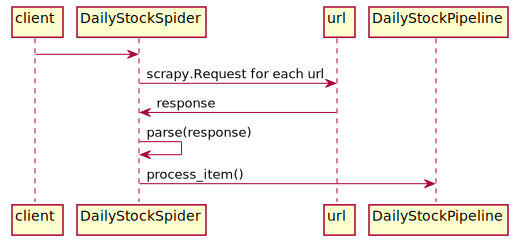

In [26]:
%%plantuml
@startuml
client -> DailyStockSpider
DailyStockSpider -> url:scrapy.Request for each url
url -> DailyStockSpider:scrapy.http.Response
DailyStockSpider -> DailyStockSpider:parse(response)
DailyStockSpider -> DailyStockPipeline:process_item()
@enduml

* Scrapy 실행
    * json output 없어도 ok?

In [2]:
!scrapy runspider ds_web_data_kospi200.py --output='ds_web_data_kospi200.json' -t json --logfile='ds_web_data_kospi200.log'

UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed

* sqlite 데이터베이스 dailystok 테이블 조회 (위 프로그램 결과)

In [18]:
%%writefile ds_web_data_kospi200.sql
select * from dailystock;

Writing ds_web_data_kospi200.sql


In [20]:
!sqlite3 ds_web_data_kospi200.sqlite < ds_web_data_kospi200.sql

KOSPI|2016-09-13 00:00:00|253.39|253.55|251.66|251.77|74548000
KOSPI|2016-09-12 00:00:00|252.37|253.43|250.53|250.53|66332000
KOSPI|2016-09-09 00:00:00|258.68|258.94|256.21|257.31|70053000
KOSPI|2016-09-08 00:00:00|260.72|261.48|259.41|260.86|79382000
KOSPI|2016-09-07 00:00:00|261.15|262.1|260.31|260.31|68749000
KOSPI|2016-09-06 00:00:00|259.39|261.16|259.26|260.93|49969000
KOSPI|2016-09-05 00:00:00|257.85|259.74|257.63|259.64|54167000
KOSPI|2016-09-02 00:00:00|256.16|256.73|255.57|256.5|49266000
KOSPI|2016-09-01 00:00:00|254.95|256.13|253.86|256.03|56098000
KOSPI|2016-08-31 00:00:00|257.21|257.49|255.9|256.87|66352000
KOSPI|2016-08-30 00:00:00|257.27|258.93|257.0|257.49|56516000
KOSPI|2016-08-29 00:00:00|254.93|256.66|254.45|256.49|62755000
KOSPI|2016-08-26 00:00:00|256.17|256.76|255.02|256.23|68304000
KOSPI|2016-08-25 00:00:00|256.78|257.76|256.0|257.26|58803000
KOSPI|2016-08-24 00:00:00|258.4|258.65|256.54|257.3|54461000
KOSPI|2016-08-23 00:00:00|257.57|258.63|257.09|258.42|65706000

* googlefinance 또는 yahoo_finance 라이브러리를 사용하여 주식데이터를 읽어올 수 있다.

## 연습 웹데이터-2: Scrapy를 사용하여 Tripadvisor 크롤링하기

* 미완성 next_link
    * onClick() javascript함수가 다음 페이지를 호출. 어떻게 url을 구해서 next_link에 넣어야 할 지 모르겠슴.
    * 다음 페이지 링크는 url을 or10, or20...으로 호출한다. urljoin 이렇게 해결??
    ```
    https://www.tripadvisor.co.kr/Hotel_Review-g294197-d301253-Reviews-The_Shilla_Seoul-Seoul.html
    https://www.tripadvisor.co.kr/Hotel_Review-g294197-d301253-Reviews-or10-The_Shilla_Seoul-Seoul.html
    ```
    
    * 참조 https://blog.monkeylearn.com/creating-sentiment-analysis-model-with-scrapy-and-monkeylearn/
* css selector
    * 공백이 있는 클래스는 실제로는 2개의 클래스, 예를 들어, class="foo bar"는:
        ```
        .foo
        .bar
        .foo.bar
        ```
        
    * 태그의 text를 출력할 경우, '::text' pseudo-element를 사용한다. 아래 css, xpath는 같은 결과를 얻는다.
        ```
        css('::text').extract() 
        xpath('.//text()').extract()
        ```
        
    * unicode - Scrapy는 unicode로 처리함 (ascii가 아니라)
        * 문제에 대해서 the best thing to do is to write :
            ```
            unicode(response.body.decode(response.encoding)).encode('utf-8')
            ```

* scrapy shell로 확인하기
    ```
    jsl@jsl-smu:~$ scrapy shell https://www.tripadvisor.co.kr/Hotels-g255060-Sydney_New_South_Wales-Hotels.html
    In [1]: res=response.css('div.listing_title [dir="ltr"]')
    In [2]: for each in res:                                 
       ...:     print each.extract()
    ...
    
    In [21]: response.css('#REVIEWS > .reviewSelector .member_info .username > span::text').extract()
    Out[21]: 
    [u'semil2015',
     u'Hyungju K',
     u'modudada',
     u'\uacf5\uacf5\ud65c\ub3d9',
     u'Gina S',
     u'Youngkyung L',
     u'\ub545\ucfe0',
     u'ceytree',
     u'JWK17',
     u'\uc131\ubc94 \uae40']
    ```

In [64]:
print u'\ucd94'

추


In [82]:
!scrapy runspider src/ds_web_data_tripadvisor.py --output='src/ds_web_data_tripadvisor.json' -t json --logfile='src/ds_web_data_tripadvisor.log'

crawling... [u'semil2015'] [u'\ucd94\ucc9c\ud638\ud154'] [u'\n\uc11c\uc6b8\uc5d0\uc11c\ub294 \ucd5c\uace0\uc758 \ud638\ud154\uc778 \uac83 \uac19\uc2b5\ub2c8\ub2e4. \ud30c\ud06c\ubdf0 \ubdd4\ud398\ub3c4 \ucd5c\uace0\uace0 \uc11c\ube44\uc2a4\ub3c4 \ucd5c\uace0\ub77c\uace0 \uc0dd\uac01\ud569\ub2c8\ub2e4. \ubdf0\ub3c4 \ub118\ub098 \uc88b\uc544\uc694...\n', u'\n']
crawling... [u'Hyungju K'] [u'\ud55c\uad6d\uc5d0\uc11c \uac00\uc7a5 \ucd94\ucc9c \ud558\ub294 \ud638\ud154'] [u'\n\uac00\uaca9\ub3c4 \uac00\uaca9\uc774\ub2c8\ub9cc\ud07c \ucd94\ucc9c\ud558\ub294 \ud638\ud154 \uc911\uc5d0 \ud558\ub098. \ub0b4\uac00 \ub300\uc811\ubc1b\uace0 \uc788\ub2e4\ub294\uac78 \ub290\ub07c\uac8c \ud574\uc8fc\ub294 \ud638\ud154\ub85c \uc218\uc601\uc7a5\ub3c4 \uc88b\uace0 \ubdf0...\n', u'\n']
crawling... [u'modudada'] [u'\uc704\uce58\ub9cc\ube7c\uba74 \ub2e4\uc88b\uc740\uacf3'] [u'\n\ub354\ud30c\ud06c\ubdf0\uc5d0\uc120 \ud06c\ub77c\uc544\uc0c1 \ubabb\ubd23\ub294\ub370\n\ud22c\uc219\ud558\uba74 \ub77c\uc6b4\uc9c0\

## 연습 웹데이터-3: 신문 크롤링 해보기

* http://www.bigkinds.or.kr/ 2016년 연말까지 무료 사용 BIG KINDS-Pro

* 스크레이핑을 하려니까 params이 검색에 문자열로 붙지 않아...
    * 가온미디어 http://myrion.iptime.org/joomlaCMS/index.php/39-iii